## nsdmd tutorial

Author: Jun Yin, Daniya Seitova

This notebook is a brief introduction to doing Bayesian inference on dark matter distribution models. The package is used to do model comparison on four Dark Matter density profiles: NFW profile, Isothermal profile, Einasto profile and Generalized DM profile by comparing their log evidence in fitting rotational velocity cruve. 
This tutorial gives an example of how to get the fitting parameters on different density profiles. 

### Getting started

First, import the package. This assumes that the package is already downloaded and installed.
If you need to download and install the package, please run setup.py.

In [1]:
from nsdmd import model 
from nsdmd import io

We will also import other standard packages that we need for nsdmd package to run. They should have been installed if the installation of the nsdmd package went well.

In [2]:
import numpy as np
import nestle
import math
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import corner
from scipy.integrate import quad

import pandas as pd



### Example of data 

The dataset contains 4 arrays, named as r, dr, v, dv. The arrays are seperated by ','. Here is an example dataset. Note that when you use the package, your data set should at leave have 5 data points. Because the model has up to 5 unknown parameters to be fitted. 

In [3]:
data_file = io.get_data_file_path('DMdataref2.txt')
data=pd.read_csv(data_file)
data[:6]


,r,dr,v,dv
0,3.20,0.232,147.862,7.79
1,3.52,0.251,154.327,7.97
2,3.87,0.282,162.777,10.10
3,4.26,0.306,168.202,8.43
4,4.69,0.349,165.788,6.87
5,5.15,0.355,164.435,8.38


### Visualizing the data

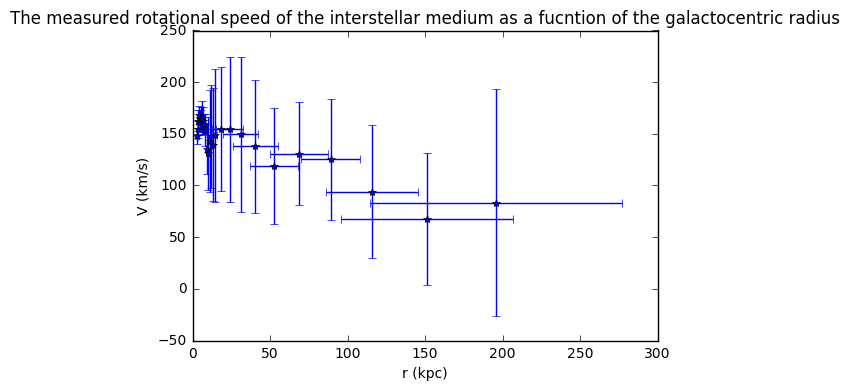

In [4]:
data_x,data_xerr,data_y,data_yerr=io.load_data(data_file)

plt.figure()
plt.errorbar(data_x,data_y,xerr=data_xerr,yerr=data_yerr,fmt='*')
plt.xlabel("r (kpc)")
plt.ylabel('V (km/s)')
plt.title("The measured rotational speed of the interstellar medium as a fucntion of the galactocentric radius")
plt.show()

### Use the package 

To run the package, you need to call function model.sample( ), which takes in model name, dataset and prior. It outputs nastle sampling results. 

In [5]:
print(model.sample.__doc__)



The function runs nested sampling. The function can be run on 4 different models. The user just needs to specify the model's loglikelihood and prior. 
----------    
The following input parameters are required:
    
loglike_model: function calculates likelihood. The name of the loglike_model needs to be specified. 
prior_transform_model: function calculates the prior. The name of the prior transformation function needs to be specified. 
datafile: datafile with format has been discussed in above. 
priorRange: an array which specifies the limits of unifrom prior for different parameters eg: priorRange =[rangeForTheta[0],rangeForTheta[1],...]
  
----------
Here are some example commands for running the fuction for 4 different models.    

    model.sample (model.loglike_NFW, model.prior_transform_NFW, 'DMdataref1.txt',[10,10E10])
    model.sample (model.loglike_ISO, model.prior_transform_ISO, 'DMdataref1.txt',[10,10E10])
    model.sample (model.loglike_Einasto, model.prior_transform_Eina

One sampling exmaple is shown in below. 

log evidence
-12.7407983943
numerical (sampling) error on logz
0.2982847909141618
array of sample parameters
[[  9.02310185e+00   9.58080771e+10]
 [  9.70729601e+00   7.32256037e+10]
 [  9.21924591e+00   7.07732215e+10]
 ..., 
 [  2.54606824e+00   3.46302213e+08]
 [  2.81512436e+00   2.87717371e+08]
 [  2.38737942e+00   3.95568447e+08]]
array of weights associated with each sample
[ 0.          0.          0.         ...,  0.00364597  0.00378488
  0.00300373]


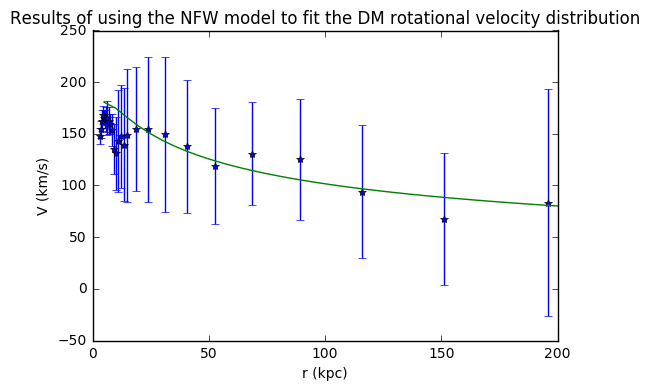

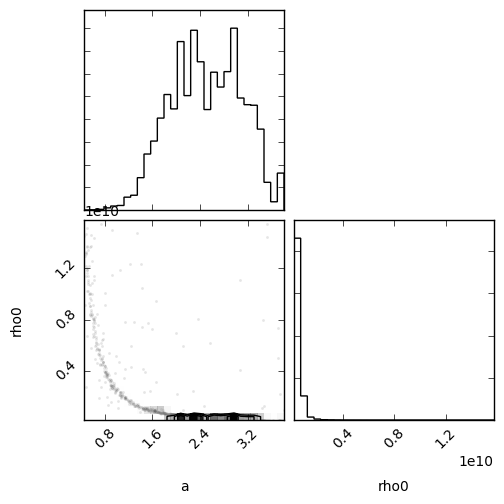

 samples: array([[  9.02310185e+00,   9.58080771e+10],
       [  9.70729601e+00,   7.32256037e+10],
       [  9.21924591e+00,   7.07732215e+10],
       ..., 
       [  2.54606824e+00,   3.46302213e+08],
       [  2.81512436e+00,   2.87717371e+08],
       [  2.38737942e+00,   3.95568447e+08]])
       h: 8.8973816490705229
 logzerr: 0.2982847909141618
   ncall: 21869
    logl: array([ -3.90303931e+06,  -3.31893018e+06,  -2.96097079e+06, ...,
        -2.93975989e+00,  -2.90236968e+00,  -3.13352811e+00])
    logz: -12.740798394343908
 weights: array([ 0.        ,  0.        ,  0.        , ...,  0.00364597,
        0.00378488,  0.00300373])
  logvol: array([ -4.61016602,  -4.62016602,  -4.63016602, ..., -15.41517019,
       -15.41517019, -15.41517019])
   niter: 1081

In [6]:
# sample (loglike_model, prior_transform_model, datafile,priorRange):

model.sample (model.loglike_NFW, model.prior_transform_NFW, 'DMdataref2.txt',[10,10e10])